In [68]:
import numpy as np
import pandas as pd
import os
import re
from datetime import date, datetime, timedelta

In [64]:
def loadData(filename):
    dataMat = []
    fr = open(filename)
    for line in fr.readlines():
        lineArr = line.strip().split('\n')
        dataMat += (lineArr)
    fr.close()
    return dataMat

def clearData(data):
    text_list = []
    idx_list = [i for i, j in enumerate(data) if j.lower() == 'prospectus summary']
    for i in range(idx_list[1] + 1, data.index('GRAPHIC')):
        j = data[i]
        j = re.sub('[\W_]+', ' ', j)
        j = re.sub('149', '', j)
        j = j.strip().lower()
        if not j.isnumeric() and len(j) > 13:
            text_list.append(j)
    return text_list

def plain_text_generator(symbol):
    file = str(symbol) + '.txt'
    try:
        if os.path.getsize(file) >= 150:
            x = loadData(file)
            y = clearData(x)
            text = " ".join(y)
            return text.strip()
        else:
            return None
    except:
        return None

In [3]:
offer_price = pd.read_csv('offer_price.csv', encoding='ISO-8859–1')
offer_price = offer_price[['Date', 'Issuer', 'Symbol', 'Lead/Joint-Lead _Managers', 
                           'Offer_Price', 'Opening_Price', '1st Day_Close', '1st Day_Chng']]
offer_price.head()

,Date,Issuer,Symbol,Lead/Joint-Lead _Managers,Offer_Price,Opening_Price,1st Day_Close,1st Day_Chng
0,2020/1/17,I-Mab,IMAB,Jefferies/ CICC,14.0,14.75,12.75,-0.0893
1,2020/1/17,LIZHI,LIZI,Credit Suisse/ Citigroup,11.0,11.03,11.63,0.0573
2,2020/1/17,Phoenix Tree Holdings Ltd.,DNK,Citigroup/ Credit Suisse/ J.P. Morgan,13.5,13.50,13.50,0.0000
3,2020/1/17,Velocity Financial,VEL,Wells Fargo Securities/ Citigroup/ JMP Securities,13.0,13.85,13.51,0.0392
4,2020/1/24,Gores Holdings IV,GHIVU,Deutsche Bank Securities,10.0,10.52,10.45,0.0450


In [65]:
offer_price['text'] = offer_price['Symbol'].apply(plain_text_generator)
offer_price.head()

,Date,Issuer,Symbol,Lead/Joint-Lead _Managers,Offer_Price,Opening_Price,1st Day_Close,1st Day_Chng,text
0,2020/1/17,I-Mab,IMAB,Jefferies/ CICC,14.0,14.75,12.75,-0.0893,the following summary is qualified in its enti...
1,2020/1/17,LIZHI,LIZI,Credit Suisse/ Citigroup,11.0,11.03,11.63,0.0573,None
2,2020/1/17,Phoenix Tree Holdings Ltd.,DNK,Citigroup/ Credit Suisse/ J.P. Morgan,13.5,13.50,13.50,0.0000,this summary highlights selected information c...
3,2020/1/17,Velocity Financial,VEL,Wells Fargo Securities/ Citigroup/ JMP Securities,13.0,13.85,13.51,0.0392,None
4,2020/1/24,Gores Holdings IV,GHIVU,Deutsche Bank Securities,10.0,10.52,10.45,0.0450,None


In [69]:
offer_price['Date'] = pd.to_datetime(offer_price['Date'])
delta = timedelta(days=31)
offer_price['onemonth'] = offer_price['Date'] - delta
offer_price.head()

,Date,Issuer,Symbol,Lead/Joint-Lead _Managers,Offer_Price,Opening_Price,1st Day_Close,1st Day_Chng,text,onemonth
0,2020-01-17,I-Mab,IMAB,Jefferies/ CICC,14.0,14.75,12.75,-0.0893,the following summary is qualified in its enti...,2019-12-17
1,2020-01-17,LIZHI,LIZI,Credit Suisse/ Citigroup,11.0,11.03,11.63,0.0573,None,2019-12-17
2,2020-01-17,Phoenix Tree Holdings Ltd.,DNK,Citigroup/ Credit Suisse/ J.P. Morgan,13.5,13.50,13.50,0.0000,this summary highlights selected information c...,2019-12-17
3,2020-01-17,Velocity Financial,VEL,Wells Fargo Securities/ Citigroup/ JMP Securities,13.0,13.85,13.51,0.0392,None,2019-12-17
4,2020-01-24,Gores Holdings IV,GHIVU,Deutsche Bank Securities,10.0,10.52,10.45,0.0450,None,2019-12-24


In [76]:
text_df = offer_price[['Issuer', 'text']]
text_df

,Issuer,text
0,I-Mab,the following summary is qualified in its enti...
1,LIZHI,None
2,Phoenix Tree Holdings Ltd.,this summary highlights selected information c...
3,Velocity Financial,None
4,Gores Holdings IV,None
...,...,...
3481,Specialty Laboratories,None
3482,W.P. Stewart & Co.,None
3483,Gemplus,this summary highlights information contained ...
3484,GenVec,None


In [74]:
df = pd.read_csv('trend_df_industry.csv')
df = df.drop(['Unnamed: 0', 'text', 'wordcount'], axis=1)
df.head()

,Date,Issuer,Symbol,Lead/Joint-Lead _Managers,Offer_Price,Opening_Price,1st Day_Close,1st Day_Chng,underpriced,Year,onemonth,avg_trend,Volume,Industry
0,2020-01-17,I-Mab,IMAB,Jefferies/ CICC,14.0,14.75,12.75,-0.0893,0,2020,2019-12-17,16.31250,536.3395,Biotechnology
1,2020-01-17,LIZHI,LIZI,Credit Suisse/ Citigroup,11.0,11.03,11.63,0.0573,1,2020,2019-12-17,18.37500,536.3395,Internet Content & Information
2,2020-01-17,Phoenix Tree Holdings Ltd.,DNK,Citigroup/ Credit Suisse/ J.P. Morgan,13.5,13.50,13.50,0.0000,0,2020,2019-12-17,NaN,536.3395,NaN
3,2020-01-17,Velocity Financial,VEL,Wells Fargo Securities/ Citigroup/ JMP Securities,13.0,13.85,13.51,0.0392,1,2020,2019-12-17,19.59375,536.3395,Mortgage Finance
4,2020-01-24,Gores Holdings IV,GHIVU,Deutsche Bank Securities,10.0,10.52,10.45,0.0450,1,2020,2019-12-24,6.25000,536.3395,Shell Companies


In [77]:
df_total = df.merge(text_df, on='Issuer', how='left')
df_total

,Date,Issuer,Symbol,Lead/Joint-Lead _Managers,Offer_Price,Opening_Price,1st Day_Close,1st Day_Chng,underpriced,Year,onemonth,avg_trend,Volume,Industry,text
0,2020-01-17,I-Mab,IMAB,Jefferies/ CICC,14.0,14.75,12.75,-0.0893,0,2020,2019-12-17,16.31250,536.3395,Biotechnology,the following summary is qualified in its enti...
1,2020-01-17,LIZHI,LIZI,Credit Suisse/ Citigroup,11.0,11.03,11.63,0.0573,1,2020,2019-12-17,18.37500,536.3395,Internet Content & Information,None
2,2020-01-17,Phoenix Tree Holdings Ltd.,DNK,Citigroup/ Credit Suisse/ J.P. Morgan,13.5,13.50,13.50,0.0000,0,2020,2019-12-17,NaN,536.3395,NaN,this summary highlights selected information c...
3,2020-01-17,Velocity Financial,VEL,Wells Fargo Securities/ Citigroup/ JMP Securities,13.0,13.85,13.51,0.0392,1,2020,2019-12-17,19.59375,536.3395,Mortgage Finance,None
4,2020-01-24,Gores Holdings IV,GHIVU,Deutsche Bank Securities,10.0,10.52,10.45,0.0450,1,2020,2019-12-24,6.25000,536.3395,Shell Companies,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3011,2004-12-15,Advance America Cash Advance,AEA,Morgan Stanley,15.0,20.50,20.50,0.3667,1,2004,2004-11-14,9.28125,431.3597,NaN,None
3012,2004-12-15,Arbinet-thexchange,ARBX,Merrill Lynch/Lehman Brothers,17.5,26.85,29.00,0.6571,1,2004,2004-11-14,NaN,431.3597,NaN,None
3013,2004-12-15,KMG AMERICA,KMA,Friedman Billings Ramsey,9.5,10.50,10.80,0.1368,1,2004,2004-11-14,NaN,431.3597,NaN,None
3014,2004-12-16,Warren Resources,WRES,KeyBanc Capital Markets,7.5,10.00,9.20,0.2267,1,2004,2004-11-15,6.68750,431.3597,NaN,None


In [123]:
# Fill NaN in 'avg_trend'
df_total['avg_trend'] = df_total['avg_trend'].fillna(value=0)
df_total

,Date,Issuer,Symbol,Lead/Joint-Lead _Managers,Offer_Price,Opening_Price,1st Day_Close,1st Day_Chng,underpriced,Year,onemonth,avg_trend,Volume,Industry,text
0,2020-01-17,I-Mab,IMAB,Jefferies/ CICC,14.0,14.75,12.75,-0.0893,0,2020,2019-12-17,16.31250,536.3395,Biotechnology,the following summary is qualified in its enti...
1,2020-01-17,LIZHI,LIZI,Credit Suisse/ Citigroup,11.0,11.03,11.63,0.0573,1,2020,2019-12-17,18.37500,536.3395,Internet Content & Information,None
2,2020-01-17,Phoenix Tree Holdings Ltd.,DNK,Citigroup/ Credit Suisse/ J.P. Morgan,13.5,13.50,13.50,0.0000,0,2020,2019-12-17,0.00000,536.3395,NaN,this summary highlights selected information c...
3,2020-01-17,Velocity Financial,VEL,Wells Fargo Securities/ Citigroup/ JMP Securities,13.0,13.85,13.51,0.0392,1,2020,2019-12-17,19.59375,536.3395,Mortgage Finance,None
4,2020-01-24,Gores Holdings IV,GHIVU,Deutsche Bank Securities,10.0,10.52,10.45,0.0450,1,2020,2019-12-24,6.25000,536.3395,Shell Companies,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3011,2004-12-15,Advance America Cash Advance,AEA,Morgan Stanley,15.0,20.50,20.50,0.3667,1,2004,2004-11-14,9.28125,431.3597,NaN,None
3012,2004-12-15,Arbinet-thexchange,ARBX,Merrill Lynch/Lehman Brothers,17.5,26.85,29.00,0.6571,1,2004,2004-11-14,0.00000,431.3597,NaN,None
3013,2004-12-15,KMG AMERICA,KMA,Friedman Billings Ramsey,9.5,10.50,10.80,0.1368,1,2004,2004-11-14,0.00000,431.3597,NaN,None
3014,2004-12-16,Warren Resources,WRES,KeyBanc Capital Markets,7.5,10.00,9.20,0.2267,1,2004,2004-11-15,6.68750,431.3597,NaN,None


In [124]:
df_total.to_csv('total.csv')

In [101]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from scipy.stats import randint as sp_randint
from scipy.stats import uniform as sp_uniform
from sklearn.tree import DecisionTreeClassifier, export_graphviz
import graphviz
from scipy.stats import randint as sp_randint
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from imblearn.over_sampling import SMOTE

In [125]:
###Decision Tree & Random Forest on 3 parameters
# Decision Tree
DT_df = df_total[['underpriced', 'avg_trend', 'Volume', 'Industry']]
DT_df.dropna(subset=['avg_trend', 'Industry'], inplace=True)
DT_df['Industry'] = LabelEncoder().fit_transform(DT_df['Industry'])

/Users/cleverpan/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
/Users/cleverpan/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


In [126]:
X = DT_df[['avg_trend', 'Volume', 'Industry']]
y = DT_df.underpriced
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = .2,
                                                    random_state=25)

In [127]:
# Data rebalancing
over_samples = SMOTE(random_state=25)
over_samples_X,over_samples_y = over_samples.fit_sample(X_train, y_train)
print('Before rebalancing:', y_train.value_counts()/len(y_train))
print('After rebalancing:', pd.Series(over_samples_y).value_counts()/len(over_samples_y))

Before rebalancing: 1    0.707989
0    0.292011
Name: underpriced, dtype: float64
After rebalancing: 1    0.5
0    0.5
Name: underpriced, dtype: float64


In [128]:
# Decision Tree
param_grid1 = {'max_depth': [2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13],
               'min_samples_split': [2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15],
               'min_samples_leaf': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15]}

d_tree1 = DecisionTreeClassifier()

random_search1 = GridSearchCV(d_tree1, 
                              param_grid=param_grid1, 
                              n_jobs=-1, 
                              cv=5, 
                              scoring='neg_mean_squared_error')
random_search1.fit(over_samples_X, over_samples_y)
print('Optimal tuning parameter values = ', random_search1.best_params_)

Optimal tuning parameter values =  {'max_depth': 13, 'min_samples_leaf': 1, 'min_samples_split': 3}


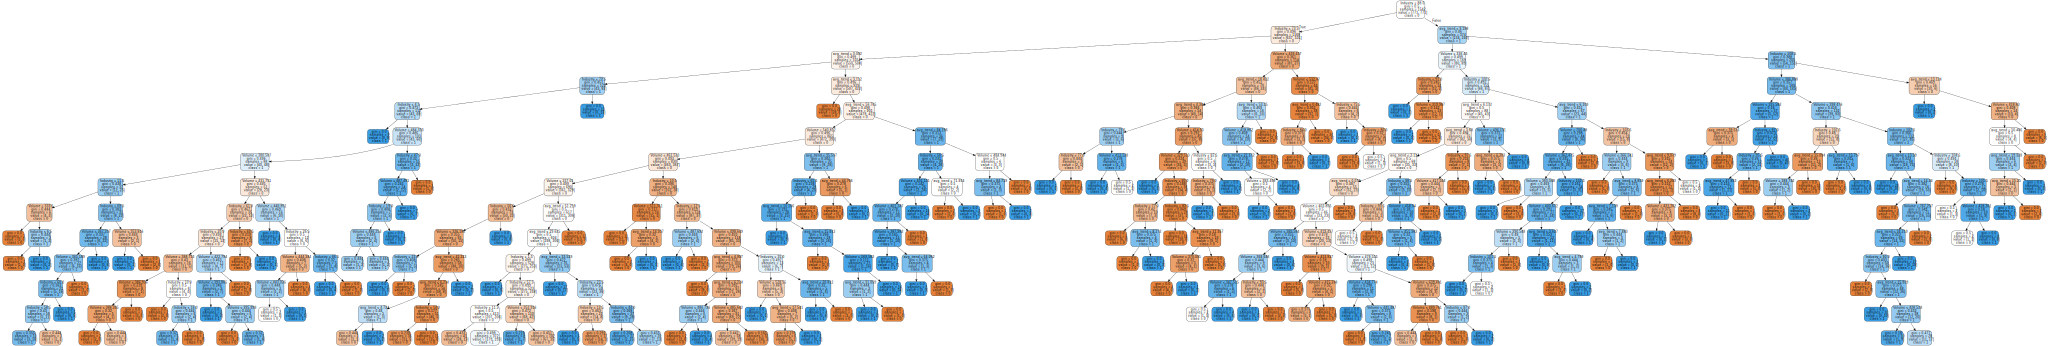

In [129]:
d_tree_best = DecisionTreeClassifier(max_depth=13, min_samples_leaf=1, min_samples_split=3)
d_tree_best.fit(over_samples_X, over_samples_y)
d_tree_best_viz = export_graphviz(d_tree_best, out_file=None,
                         feature_names=['avg_trend', 'Volume', 'Industry'],
                         class_names=DT_df.underpriced.astype(str),
                         filled=True, rounded=True,
                         special_characters=True)
graph = graphviz.Source(d_tree_best_viz)
graph.render('Viz')
graph

In [130]:
y_pred = d_tree_best.predict(X_test)
MSE = mean_squared_error(y_test, y_pred)
print('MSE=', MSE)

MSE= 0.36996336996337


In [131]:
# Random Forest
param_dist2 = {'n_estimators': [10, 200], 
               'min_samples_split': sp_randint(2, 20), 
               'min_samples_leaf': sp_randint(2, 20),
               'max_features': sp_randint(1, 8)}
               
     
rf_tree2 = RandomForestClassifier(bootstrap=True,
                                  n_jobs=-1, 
                                  oob_score=True, 
                                  random_state=25)

random_search2 = RandomizedSearchCV(rf_tree2, 
                                    param_distributions=param_dist2,
                                    n_iter=100, 
                                    n_jobs=-1, 
                                    cv=4, 
                                    random_state=25,
                                    scoring='neg_mean_squared_error')
random_search2.fit(over_samples_X, over_samples_y)
print('Optimal tuning parameter values = ', random_search2.best_params_)

Optimal tuning parameter values =  {'max_features': 3, 'min_samples_leaf': 4, 'min_samples_split': 5, 'n_estimators': 200}


In [132]:
rf_tree_best = RandomForestClassifier(max_features=3, min_samples_leaf=4, min_samples_split=5,
                                 n_estimators=200)
rf_tree_best.fit(over_samples_X, over_samples_y)
y_pred = rf_tree_best.predict(X_test)
MSE_rf = mean_squared_error(y_test, y_pred)
print('MSE=', MSE_rf)

MSE= 0.3956043956043956


In [137]:
#Add Sentiment factors
senti_df = pd.read_csv('sentiment.csv')
senti_df.drop('Unnamed: 0', axis=1, inplace=True)
senti_df.dropna(subset=['text'], inplace=True)

# Fill NaN in 'avg_trend'
senti_df['avg_trend'] = senti_df['avg_trend'].fillna(value=0)

In [138]:
#DT & RF
X = senti_df[['avg_trend', 'Volume', 'wordcount','Positive',
       'Negative', 'Uncertain', 'Weak_Modal', 'Strong_Modal']]
y = senti_df.underpriced
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = .2,
                                                    random_state=25)

In [139]:
# Data rebalancing
over_samples = SMOTE(random_state=25)
over_samples_X,over_samples_y = over_samples.fit_sample(X_train, y_train)
print('Before rebalancing:', y_train.value_counts()/len(y_train))
print('After rebalancing:', pd.Series(over_samples_y).value_counts()/len(over_samples_y))

Before rebalancing: 1    0.706147
0    0.293853
Name: underpriced, dtype: float64
After rebalancing: 1    0.5
0    0.5
Name: underpriced, dtype: float64


In [141]:
# Decision Tree
d_tree3 = DecisionTreeClassifier()

grid_search3 = GridSearchCV(d_tree3, 
                            param_grid=param_grid1, 
                            n_jobs=-1, 
                            cv=5, 
                            scoring='neg_mean_squared_error')
grid_search3.fit(over_samples_X, over_samples_y)
print('Optimal tuning parameter values = ', grid_search3.best_params_)

Optimal tuning parameter values =  {'max_depth': 10, 'min_samples_leaf': 4, 'min_samples_split': 3}


In [142]:
d_tree_best_2 = DecisionTreeClassifier(max_depth=10, min_samples_leaf=4, min_samples_split=3)
d_tree_best_2.fit(over_samples_X, over_samples_y)
y_pred = d_tree_best_2.predict(X_test)
MSE = mean_squared_error(y_test, y_pred)
print('MSE=', MSE)

MSE= 0.38922155688622756


In [143]:
# Random Forest
rf_tree4 = RandomForestClassifier(bootstrap=True,
                                  n_jobs=-1, 
                                  oob_score=True, 
                                  random_state=25)

random_search4 = RandomizedSearchCV(rf_tree4, 
                                    param_distributions=param_dist2,
                                    n_iter=100, 
                                    n_jobs=-1, 
                                    cv=4, 
                                    random_state=25,
                                    scoring='neg_mean_squared_error')
random_search4.fit(over_samples_X, over_samples_y)
print('Optimal tuning parameter values = ', random_search4.best_params_)

Optimal tuning parameter values =  {'max_features': 2, 'min_samples_leaf': 4, 'min_samples_split': 8, 'n_estimators': 200}


In [144]:
rf_tree_best_2 = RandomForestClassifier(max_features=2, min_samples_leaf=4, min_samples_split=8,
                                 n_estimators=200)
rf_tree_best_2.fit(over_samples_X, over_samples_y)
y_pred = rf_tree_best_2.predict(X_test)
MSE_rf = mean_squared_error(y_test, y_pred)
print('MSE=', MSE_rf)

MSE= 0.3532934131736527


In [145]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import metrics
from sklearn.preprocessing import LabelEncoder,OneHotEncoder
from keras.models import Model
from keras.layers import LSTM, Activation, Dense, Dropout, Input, Embedding
from keras.optimizers import RMSprop
from keras.preprocessing.text import Tokenizer
from keras.preprocessing import sequence
from keras.callbacks import EarlyStopping

In [146]:
# LSTM
train_df = senti_df.sample(frac=0.8, random_state=25)
test_df = senti_df.drop(train_df.index)

train_df = train_df.sort_index()
train_df = train_df.reset_index(drop=True)
test_df = test_df.sort_index()
test_df = test_df.reset_index(drop=True)

In [149]:
#Encoding the label
train_y = train_df.underpriced
test_y = test_df.underpriced
le = LabelEncoder()
train_y = le.fit_transform(train_y).reshape(-1,1)
test_y = le.fit_transform(test_y).reshape(-1,1)

#One-hot labeling
ohe = OneHotEncoder()
train_y = ohe.fit_transform(train_y).toarray()
test_y = ohe.fit_transform(test_y).toarray()

In [151]:
max_words = 80000
max_len = 6000
tok = Tokenizer(num_words=max_words)  
tok.fit_on_texts(train_df.text)

for ii,iterm in enumerate(tok.word_index.items()):
    if ii < 10:
        print(iterm)
    else:
        break
print("===================")  
for ii,iterm in enumerate(tok.word_counts.items()):
    if ii < 10:
        print(iterm)
    else:
        break

('the', 1)
('of', 2)
('and', 3)
('to', 4)
('in', 5)
('our', 6)
('a', 7)
('or', 8)
('for', 9)
('we', 10)
('the', 4293223)
('following', 83376)
('summary', 18963)
('is', 467996)
('qualified', 20350)
('in', 1661158)
('its', 136835)
('entirety', 2020)
('by', 486288)
('and', 2741446)


In [152]:
train_seq = tok.texts_to_sequences(train_df.text)
test_seq = tok.texts_to_sequences(test_df.text)
train_seq_mat = sequence.pad_sequences(train_seq, maxlen=max_len)
test_seq_mat = sequence.pad_sequences(test_seq, maxlen=max_len)

print(train_seq_mat.shape)
print(test_seq_mat.shape)

(667, 6000)
(167, 6000)


In [153]:
## Define LSTM Model
inputs = Input(name='inputs',shape=[max_len])
## Embedding
layer = Embedding(max_words+1, 64, input_length=max_len)(inputs)
layer = LSTM(64)(layer)
layer = Dense(64,activation="relu",name="FC1")(layer)
layer = Dropout(0.5)(layer)
layer = Dense(2,activation="softmax",name="FC2")(layer)
model = Model(inputs=inputs,outputs=layer)
model.summary()
model.compile(loss="categorical_crossentropy",optimizer=RMSprop(),metrics=["accuracy"])

Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
inputs (InputLayer)          (None, 6000)              0         
_________________________________________________________________
embedding_1 (Embedding)      (None, 6000, 64)          5120064   
_________________________________________________________________
lstm_1 (LSTM)                (None, 64)                33024     
_________________________________________________________________
FC1 (Dense)                  (None, 64)                4160      
_________________________________________________________________
dropout_1 (Dropout)          (None, 64)                0         
_________________________________________________________________
FC2 (Dense)                  (None, 2)                 130       
Total params: 5,157,378
Trainable params: 5,157,378
Non-trainable params: 0
_________________________________________________

In [154]:
model_fit = model.fit(train_seq_mat, train_y, batch_size=32,epochs=10,
                     callbacks=[EarlyStopping(monitor='val_loss',min_delta=0.0001)])

/Users/cleverpan/opt/anaconda3/lib/python3.7/site-packages/tensorflow/python/framework/indexed_slices.py:434: UserWarning: Converting sparse IndexedSlices to a dense Tensor of unknown shape. This may consume a large amount of memory.
  "Converting sparse IndexedSlices to a dense Tensor of unknown shape. "


Epoch 1/10
667/667 [==============================] - 85s 127ms/step - loss: 0.6287 - accuracy: 0.6972
Epoch 2/10


/Users/cleverpan/opt/anaconda3/lib/python3.7/site-packages/keras/callbacks/callbacks.py:846: RuntimeWarning: Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss,accuracy
  (self.monitor, ','.join(list(logs.keys()))), RuntimeWarning


667/667 [==============================] - 82s 123ms/step - loss: 0.5827 - accuracy: 0.7076
Epoch 3/10
667/667 [==============================] - 80s 120ms/step - loss: 0.5663 - accuracy: 0.7151
Epoch 4/10
667/667 [==============================] - 80s 120ms/step - loss: 0.5068 - accuracy: 0.7481
Epoch 5/10
667/667 [==============================] - 79s 118ms/step - loss: 0.4703 - accuracy: 0.8021
Epoch 6/10
667/667 [==============================] - 79s 118ms/step - loss: 0.4159 - accuracy: 0.8096
Epoch 7/10
667/667 [==============================] - 79s 118ms/step - loss: 0.3760 - accuracy: 0.8201
Epoch 8/10
667/667 [==============================] - 79s 118ms/step - loss: 0.4236 - accuracy: 0.8501
Epoch 9/10
667/667 [==============================] - 79s 118ms/step - loss: 0.3334 - accuracy: 0.8471
Epoch 10/10
667/667 [==============================] - 78s 117ms/step - loss: 0.2982 - accuracy: 0.8666


In [155]:
test_pre = model.predict(test_seq_mat)
confm = metrics.confusion_matrix(np.argmax(test_pre,axis=1),np.argmax(test_y,axis=1))
print(metrics.classification_report(np.argmax(test_pre,axis=1),np.argmax(test_y,axis=1)))

              precision    recall  f1-score   support

           0       0.31      0.36      0.33        42
           1       0.77      0.74      0.75       125

    accuracy                           0.64       167
   macro avg       0.54      0.55      0.54       167
weighted avg       0.66      0.64      0.65       167



In [156]:
MSE = mean_squared_error(test_y, test_pre)
print('MSE=', MSE)

MSE= 0.28419245370434676


In [157]:
# Extract the variables from the LSTM model hidden layer
dense1_layer_model = Model(inputs=model.input, 
                           outputs=model.get_layer('FC1').output)

In [158]:
dense1_output = dense1_layer_model.predict(train_seq_mat)
print(dense1_output)

[[0.25031826 0.         0.         ... 0.         0.32398915 0.        ]
 [0.20269303 0.         0.00934591 ... 0.         0.2496603  0.        ]
 [0.38354912 0.         0.         ... 0.         0.48992586 0.        ]
 ...
 [0.         0.17480552 0.10015078 ... 0.15101928 0.         0.17770249]
 [0.16182192 0.         0.         ... 0.         0.19063577 0.        ]
 [0.         0.55355436 0.23656099 ... 0.44615227 0.         0.5389204 ]]


In [159]:
layer_df = pd.DataFrame(dense1_output)
new_train_df = pd.concat([train_df, layer_df], axis=1)
new_X_train = new_train_df[[ 'wordcount', 'avg_trend',
                          'Volume',                  'Positive',
                        'Negative',                 'Uncertain',
                      'Weak_Modal',              'Strong_Modal',
                                 0,                           1,
                                 2,                           3,
                                 4,                           5,
                                 6,                           7,
                                 8,                           9,
                                10,                          11,
                                12,                          13,
                                14,                          15,
                                16,                          17,
                                18,                          19,
                                20,                          21,
                                22,                          23,
                                24,                          25,
                                26,                          27,
                                28,                          29,
                                30,                          31]]
new_X_train

,wordcount,avg_trend,Volume,Positive,Negative,Uncertain,Weak_Modal,Strong_Modal,0,1,...,22,23,24,25,26,27,28,29,30,31
0,142487,16.31250,536.3395,0.014345,0.025301,0.020121,0.012296,0.006323,0.250318,0.000000,...,0.334739,0.260637,0.000000,0.000000,0.416870,0.000000,0.0,0.451344,0.000000,0.345618
1,90439,0.00000,536.3395,0.012495,0.024447,0.018521,0.012373,0.006822,0.202693,0.000000,...,0.250278,0.194152,0.000000,0.000000,0.290351,0.000000,0.0,0.317439,0.000000,0.254009
2,86461,3.12500,536.3395,0.009449,0.026070,0.021779,0.013393,0.006546,0.383549,0.000000,...,0.521414,0.392678,0.000000,0.000000,0.658198,0.000000,0.0,0.731202,0.000000,0.528214
3,59009,14.71875,536.3395,0.014744,0.031588,0.025928,0.017201,0.007694,0.000000,0.158605,...,0.000000,0.000000,0.000976,0.084898,0.000000,0.124357,0.0,0.000000,0.089757,0.000000
4,83887,21.56250,536.3395,0.013447,0.029826,0.023794,0.014746,0.007510,0.000000,0.190693,...,0.000000,0.000000,0.000000,0.090978,0.000000,0.143946,0.0,0.000000,0.120678,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
662,104,21.28125,572.0312,0.000000,0.009615,0.019231,0.019231,0.000000,0.206843,0.000000,...,0.277114,0.203136,0.000000,0.000000,0.355793,0.000000,0.0,0.388154,0.000000,0.269075
663,69166,93.56250,486.3373,0.010468,0.017841,0.018044,0.008906,0.005725,0.086796,0.032262,...,0.103781,0.094069,0.000000,0.022019,0.145172,0.014651,0.0,0.091346,0.023618,0.123316
664,64451,43.87500,486.3373,0.013033,0.028688,0.020232,0.011854,0.006873,0.000000,0.174806,...,0.000000,0.000000,0.011350,0.090540,0.000000,0.135379,0.0,0.000000,0.092407,0.000000
665,48812,6.43750,486.3373,0.011821,0.022781,0.021286,0.011677,0.008809,0.161822,0.000000,...,0.204683,0.159482,0.000000,0.000000,0.266034,0.000000,0.0,0.282431,0.000000,0.219012


In [160]:
new_y_train = new_train_df.underpriced

In [162]:
# Random Forest-LSTM
rf_tree6 = RandomForestClassifier(bootstrap=True,
                                  n_jobs=-1, 
                                  oob_score=True, 
                                  random_state=25)
random_search6 = RandomizedSearchCV(rf_tree6, 
                                    param_distributions=param_dist2,
                                    n_iter=100, 
                                    n_jobs=-1, 
                                    cv=5, 
                                    random_state=25,
                                    scoring='neg_mean_squared_error')
random_search6.fit(new_X_train, new_y_train)
print('Optimal tuning parameter values = ', random_search6.best_params_)

Optimal tuning parameter values =  {'max_features': 1, 'min_samples_leaf': 17, 'min_samples_split': 3, 'n_estimators': 10}


/Users/cleverpan/opt/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:523: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
/Users/cleverpan/opt/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:528: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])


In [163]:
dense1_output_test = dense1_layer_model.predict(test_seq_mat)
test_layer_df = pd.DataFrame(dense1_output_test)
new_test_df = pd.concat([test_df, test_layer_df], axis=1)
new_X_test = new_test_df[[ 'wordcount', 'avg_trend',
                          'Volume',                  'Positive',
                        'Negative',                 'Uncertain',
                      'Weak_Modal',              'Strong_Modal',
                                 0,                           1,
                                 2,                           3,
                                 4,                           5,
                                 6,                           7,
                                 8,                           9,
                                10,                          11,
                                12,                          13,
                                14,                          15,
                                16,                          17,
                                18,                          19,
                                20,                          21,
                                22,                          23,
                                24,                          25,
                                26,                          27,
                                28,                          29,
                                30,                          31]]
new_X_test

,wordcount,avg_trend,Volume,Positive,Negative,Uncertain,Weak_Modal,Strong_Modal,0,1,...,22,23,24,25,26,27,28,29,30,31
0,79043,7.65625,968.74040,0.012955,0.025024,0.028756,0.017585,0.015903,0.000000,0.119923,...,0.000000,0.000000,0.000000,0.064822,0.000000,0.097224,0.0,0.000000,0.101825,0.030672
1,72208,23.03125,968.74040,0.016162,0.030440,0.026881,0.018682,0.009223,0.000000,0.197198,...,0.000000,0.000000,0.000000,0.094071,0.000000,0.148094,0.0,0.000000,0.123603,0.000000
2,111384,0.00000,786.97140,0.010549,0.019500,0.020452,0.009759,0.007425,0.000000,0.160661,...,0.000000,0.000000,0.000000,0.080096,0.000000,0.124290,0.0,0.000000,0.113314,0.000000
3,76023,12.40625,34.20102,0.013983,0.032885,0.029267,0.019231,0.007998,0.000000,0.162784,...,0.000000,0.000000,0.007698,0.087109,0.000000,0.126679,0.0,0.000000,0.085328,0.000000
4,89384,9.43750,34.20102,0.012978,0.026571,0.021111,0.014376,0.006265,0.274963,0.000000,...,0.354163,0.273931,0.000000,0.000000,0.465062,0.000000,0.0,0.525438,0.000000,0.360003
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
162,64965,16.87500,353.25900,0.012499,0.017348,0.016794,0.008928,0.006034,0.000000,0.967640,...,0.000000,0.000000,0.253943,0.461953,0.000000,0.714346,0.0,0.000000,0.418487,0.000000
163,69330,0.00000,549.55550,0.013818,0.020914,0.022717,0.009606,0.006476,0.000000,0.683085,...,0.000000,0.000000,0.204225,0.330460,0.000000,0.501800,0.0,0.000000,0.275847,0.000000
164,56503,17.84375,486.33730,0.012583,0.018194,0.021609,0.009221,0.008531,0.000000,0.331177,...,0.000000,0.000000,0.053295,0.162894,0.000000,0.225688,0.0,0.000000,0.146220,0.000000
165,89612,18.06250,439.10370,0.012554,0.019863,0.016371,0.010657,0.006316,0.000000,0.212530,...,0.000000,0.000000,0.026770,0.100906,0.000000,0.138000,0.0,0.000000,0.082182,0.000000


In [164]:
new_y_test = new_test_df.underpriced

In [166]:
rf_tree_best_3 = RandomForestClassifier(max_features=1, min_samples_leaf=17, min_samples_split=3,
                                 n_estimators=10)
rf_tree_best_3.fit(new_X_train, new_y_train)
y_pred_new = rf_tree_best_3.predict(new_X_test)
# mse = mean_squared_error(new_y_test,y_pred_new)
print('MSE=', mean_squared_error(new_y_test,y_pred_new))

MSE= 0.3592814371257485


In [168]:
sentiment = senti_df[['Issuer', 'wordcount','Positive', 
                      'Negative', 'Uncertain', 'Weak_Modal', 'Strong_Modal']]
final_data = df_total.merge(sentiment, on='Issuer', how='left')
final_data

,Date,Issuer,Symbol,Lead/Joint-Lead _Managers,Offer_Price,Opening_Price,1st Day_Close,1st Day_Chng,underpriced,Year,...,avg_trend,Volume,Industry,text,wordcount,Positive,Negative,Uncertain,Weak_Modal,Strong_Modal
0,2020-01-17,I-Mab,IMAB,Jefferies/ CICC,14.0,14.75,12.75,-0.0893,0,2020,...,16.31250,536.3395,Biotechnology,the following summary is qualified in its enti...,142487.0,0.014345,0.025301,0.020121,0.012296,0.006323
1,2020-01-17,LIZHI,LIZI,Credit Suisse/ Citigroup,11.0,11.03,11.63,0.0573,1,2020,...,18.37500,536.3395,Internet Content & Information,None,NaN,NaN,NaN,NaN,NaN,NaN
2,2020-01-17,Phoenix Tree Holdings Ltd.,DNK,Citigroup/ Credit Suisse/ J.P. Morgan,13.5,13.50,13.50,0.0000,0,2020,...,0.00000,536.3395,NaN,this summary highlights selected information c...,90439.0,0.012495,0.024447,0.018521,0.012373,0.006822
3,2020-01-17,Velocity Financial,VEL,Wells Fargo Securities/ Citigroup/ JMP Securities,13.0,13.85,13.51,0.0392,1,2020,...,19.59375,536.3395,Mortgage Finance,None,NaN,NaN,NaN,NaN,NaN,NaN
4,2020-01-24,Gores Holdings IV,GHIVU,Deutsche Bank Securities,10.0,10.52,10.45,0.0450,1,2020,...,6.25000,536.3395,Shell Companies,None,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3027,2004-12-15,Advance America Cash Advance,AEA,Morgan Stanley,15.0,20.50,20.50,0.3667,1,2004,...,9.28125,431.3597,NaN,None,NaN,NaN,NaN,NaN,NaN,NaN
3028,2004-12-15,Arbinet-thexchange,ARBX,Merrill Lynch/Lehman Brothers,17.5,26.85,29.00,0.6571,1,2004,...,0.00000,431.3597,NaN,None,NaN,NaN,NaN,NaN,NaN,NaN
3029,2004-12-15,KMG AMERICA,KMA,Friedman Billings Ramsey,9.5,10.50,10.80,0.1368,1,2004,...,0.00000,431.3597,NaN,None,NaN,NaN,NaN,NaN,NaN,NaN
3030,2004-12-16,Warren Resources,WRES,KeyBanc Capital Markets,7.5,10.00,9.20,0.2267,1,2004,...,6.68750,431.3597,NaN,None,NaN,NaN,NaN,NaN,NaN,NaN
